In [1]:
import torch

In [3]:
x = torch.tensor(2.0, requires_grad=True)

In [4]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1

print(y)

tensor(63., grad_fn=<AddBackward0>)


In [5]:
y.backward()

In [6]:
print(x.grad)

tensor(93.)


In [7]:
x = torch.tensor([[1.,2,3],[3,2,1]], requires_grad=True)
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


In [8]:
y = 3*x + 2
print(y)

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


In [10]:
z = 2*y**2
print(z)

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [11]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


In [12]:
out.backward()
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn

In [7]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [8]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [11]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1), dtype=torch.float)

In [15]:
y = 2*X +1 + e

In [16]:
y.shape

torch.Size([50, 1])

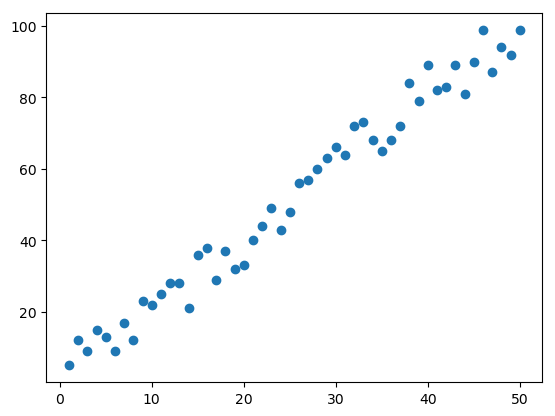

In [17]:
plt.scatter(X.numpy(), y.numpy())

In [21]:
torch.manual_seed(59)

model=nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [22]:
class Model(nn.Module):
    
    def __init__(self, in_features, out_features):
        
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
        

In [24]:
torch.manual_seed(59)

model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [25]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [26]:
x1 = np.linspace(0,50,50)

In [27]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [28]:
w1 = 0.10598
b1 = 0.96381

y1 = w1*x1 + b1

In [29]:
y1

array([0.96381   , 1.07195286, 1.18009571, 1.28823857, 1.39638143,
       1.50452429, 1.61266714, 1.72081   , 1.82895286, 1.93709571,
       2.04523857, 2.15338143, 2.26152429, 2.36966714, 2.47781   ,
       2.58595286, 2.69409571, 2.80223857, 2.91038143, 3.01852429,
       3.12666714, 3.23481   , 3.34295286, 3.45109571, 3.55923857,
       3.66738143, 3.77552429, 3.88366714, 3.99181   , 4.09995286,
       4.20809571, 4.31623857, 4.42438143, 4.53252429, 4.64066714,
       4.74881   , 4.85695286, 4.96509571, 5.07323857, 5.18138143,
       5.28952429, 5.39766714, 5.50581   , 5.61395286, 5.72209571,
       5.83023857, 5.93838143, 6.04652429, 6.15466714, 6.26281   ])

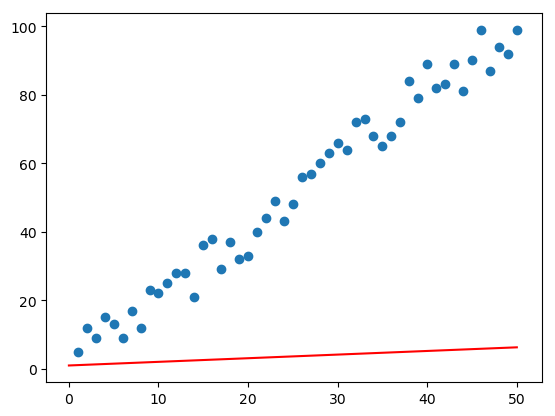

In [31]:
plt.plot(x1, y1, 'r')
plt.scatter(X.numpy(), y.numpy())

In [32]:
criterion = nn.MSELoss()

In [33]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [36]:
epochs = 50
losses = []

for i in range(epochs):
    
    i = i+1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    
    print(f'epoch: {i}  loss: {loss.item()}  weight: {model.linear.weight.item()}  bias: {model.linear.bias.item()}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1  loss: 3057.216796875  weight: 0.10597813129425049  bias: 0.9637961387634277
epoch: 2  loss: 1588.5311279296875  weight: 3.334900379180908  bias: 1.0604636669158936
epoch: 3  loss: 830.2999877929688  weight: 1.0148327350616455  bias: 0.9922628402709961
epoch: 4  loss: 438.8524169921875  weight: 2.6817996501922607  bias: 1.0425218343734741
epoch: 5  loss: 236.7615203857422  weight: 1.4840211868286133  bias: 1.0076650381088257
epoch: 6  loss: 132.4291229248047  weight: 2.3446059226989746  bias: 1.0339646339416504
epoch: 7  loss: 78.56572723388672  weight: 1.7262253761291504  bias: 1.0163217782974243
epoch: 8  loss: 50.75775909423828  weight: 2.170504093170166  bias: 1.0302516222000122
epoch: 9  loss: 36.4012336730957  weight: 1.8512457609176636  bias: 1.0214954614639282
epoch: 10  loss: 28.989229202270508  weight: 2.0806007385253906  bias: 1.029038906097412
epoch: 11  loss: 25.162382125854492  weight: 1.9157683849334717  bias: 1.0248701572418213
epoch: 12  loss: 23.1864738464355

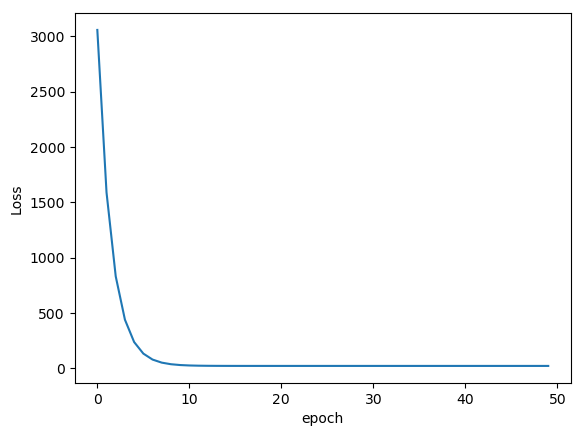

In [37]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [38]:
x1 = np.linspace(0.0, 50.0, 50.0)
w1 = model.linear.weight.item()
b1 = model.linear.bias.item()

predicted_y = x1*w1 + b1

E:\Anaconda\envs\pytorchenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


In [39]:
predicted_y

array([  1.05575156,   3.08005679,   5.10436203,   7.12866726,
         9.15297249,  11.17727772,  13.20158295,  15.22588818,
        17.25019342,  19.27449865,  21.29880388,  23.32310911,
        25.34741434,  27.37171957,  29.39602481,  31.42033004,
        33.44463527,  35.4689405 ,  37.49324573,  39.51755096,
        41.5418562 ,  43.56616143,  45.59046666,  47.61477189,
        49.63907712,  51.66338236,  53.68768759,  55.71199282,
        57.73629805,  59.76060328,  61.78490851,  63.80921375,
        65.83351898,  67.85782421,  69.88212944,  71.90643467,
        73.9307399 ,  75.95504514,  77.97935037,  80.0036556 ,
        82.02796083,  84.05226606,  86.07657129,  88.10087653,
        90.12518176,  92.14948699,  94.17379222,  96.19809745,
        98.22240268, 100.24670792])

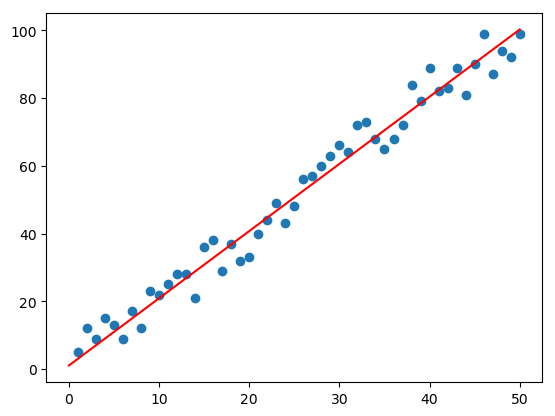

In [44]:
plt.scatter(X, y)
plt.plot(x1, predicted_y, 'r')